In [2]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

In [3]:
# frequency is the number of times a wave repeats a second
frequency = 1000
num_samples = 48000

# The sampling rate of the analog to digital convert
sampling_rate = 48000.0
amplitude = 16000
file = "test.wav"

In [4]:
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]


In [5]:
nframes=num_samples
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2

In [6]:
wav_file=wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))


In [7]:
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

# FFT in Python:

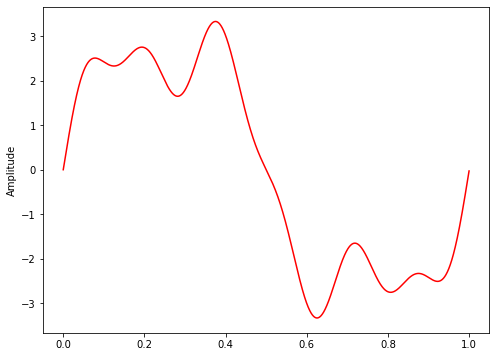

In [8]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 3
x += np.sin(2*np.pi*freq*t)

freq = 6  
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [9]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

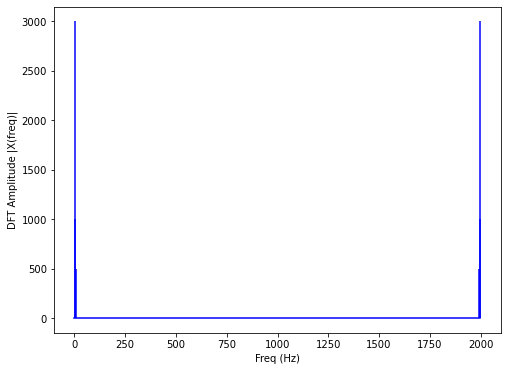

In [10]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

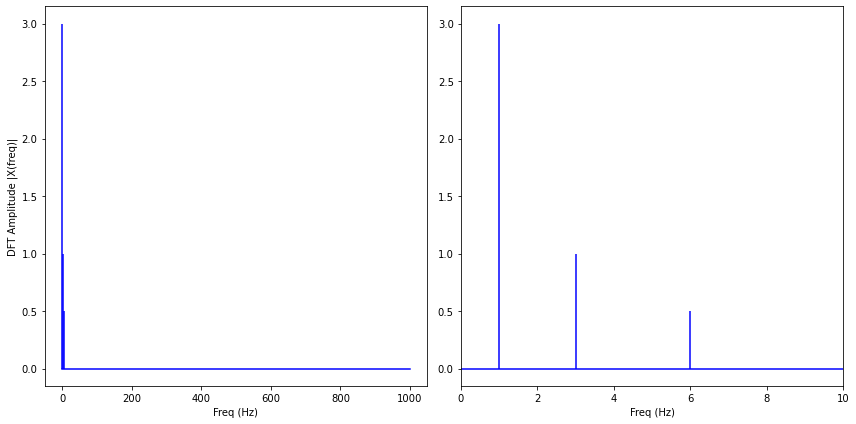

In [11]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [12]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [13]:
sr = 2000
%timeit DFT(gen_sig(sr))

390 ms ± 49.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\91967\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


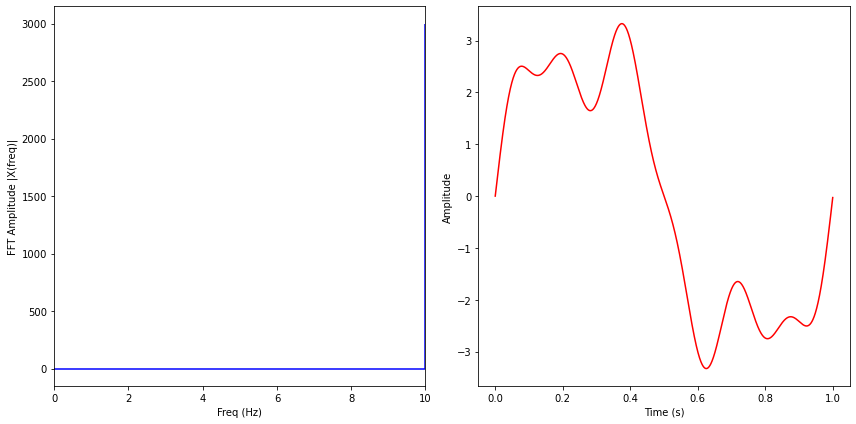

In [23]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [24]:
%timeit fft(x)

34.3 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


C:\Users\91967\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


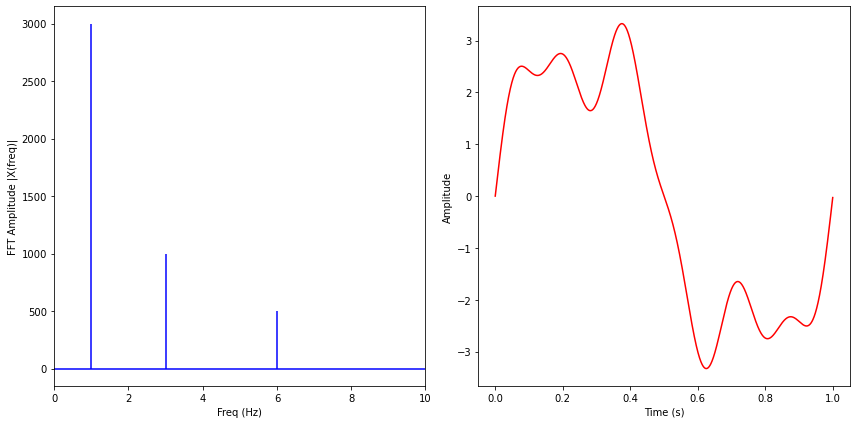

In [16]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [17]:
%timeit fft(x)

26.5 µs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


So, we can use the built-in functions scipy.fft or numpy.fft in python, and we can see that Scipy is faster than Numpy. 

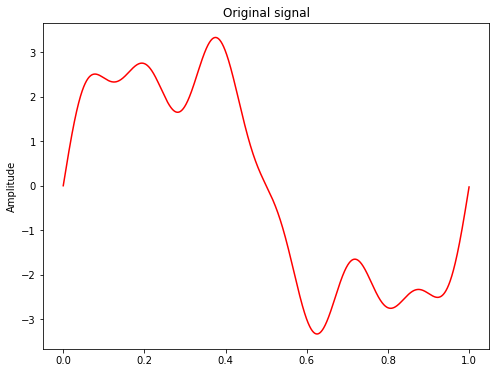

In [25]:
#FILTERS USING FFT

from scipy.fftpack import fftfreq
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

In [26]:
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

C:\Users\91967\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


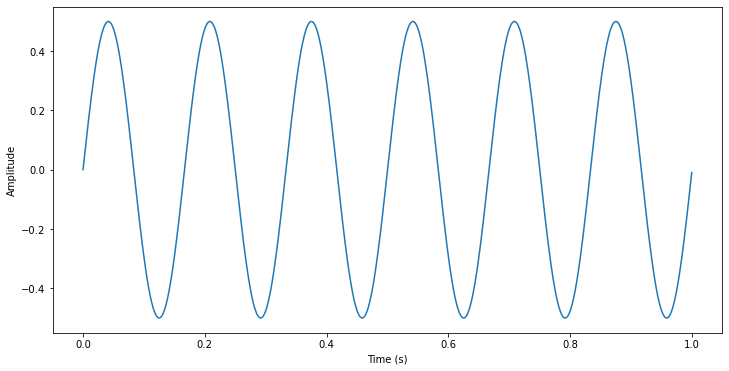

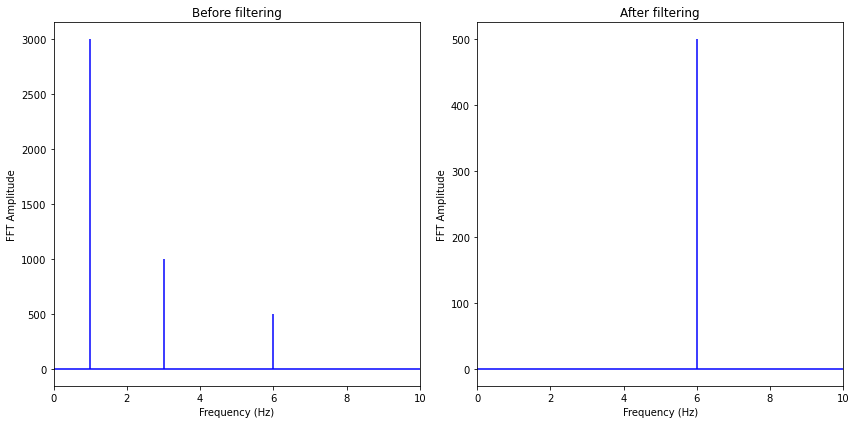

In [20]:
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()
